In [3]:
import pandas as pd
df = pd.read_csv('women.csv')

In [4]:
df.head()

,height,weight
0,58,115
1,59,117
2,60,120
3,61,123
4,62,126


In [5]:
df.describe()

,height,weight
count,15.000000,15.000000
mean,65.000000,136.733333
std,4.472136,15.498694
min,58.000000,115.000000
25%,61.500000,124.500000
50%,65.000000,135.000000
75%,68.500000,148.000000
max,72.000000,164.000000


In [6]:
df.isnull().sum()

height    0
weight    0
dtype: int64

In [7]:
import matplotlib.pyplot as plt 
plt.scatter(df['height'],df['weight'],color='orchid') 
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

<Figure size 640x480 with 1 Axes>

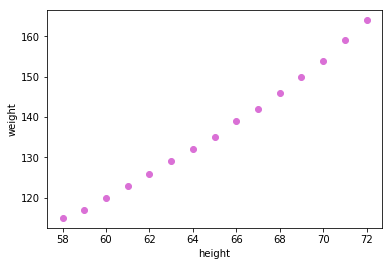

In [8]:
import matplotlib.pyplot as plt 
plt.scatter(df['height'],df['weight'],color='orchid') 
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

In [9]:
import statsmodels.api as sm
x = sm.add_constant(df['height']) 
y = df['weight']
x.sample(6)

,const,height
6,1.0,64
11,1.0,69
8,1.0,66
5,1.0,63
14,1.0,72
1,1.0,59


In [10]:
model = sm.OLS(y, x) 
model_result = model.fit() 
model_result.summary()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1433.
Date:                Fri, 20 Sep 2019   Prob (F-statistic):           1.09e-14
Time:                        19:04:36   Log-Likelihood:                -26.541
No. Observations:                  15   AIC:                             57.08
Df Residuals:                      13   BIC:                             58.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -87.5167      5.937    -14.741      0.000    -100.343     -74.691
height         3.4500      0.091     37.855      0.000       3.253       3.647
==============================================================================
Omnibus:                        2.396   Durbin-Watson:                   0.315
Prob(Omnibus):                  0.302   Jarque-Bera (JB):                1.660
Skew:                           0.789   Prob(JB):                        0.436
Kurtosis:                       2.596   Cond. No.                         982.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
y_hat = model_result.predict(x)
# 将预测结果转换为 DataFrame 格式方便转换，并将列名保存为‘pred’
y_hat = pd.DataFrame(y_hat ,columns=['pred'])
# 合并原始数据和预测值并查看
df_merge = df.merge(y_hat,left_index=True,right_index=True) 
df.head()

,height,weight
0,58,115
1,59,117
2,60,120
3,61,123
4,62,126


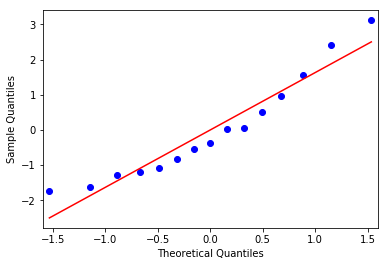

In [13]:
sm.qqplot(model_result.resid,line='r') 
plt.show()

In [14]:
import pandas as pd
df = pd.read_csv('mtcars_p2.csv')

In [15]:
df.shape

(32, 4)

In [16]:
df.head()

,mpg,hp,vs,am
0,21.0,110,0,1
1,21.0,110,0,1
2,22.8,93,1,1
3,21.4,110,1,0
4,18.7,175,0,0


In [17]:
df.describe()

,mpg,hp,vs,am
count,32.000000,32.000000,32.000000,32.000000
mean,20.090625,146.687500,0.437500,0.406250
std,6.026948,68.562868,0.504016,0.498991
min,10.400000,52.000000,0.000000,0.000000
25%,15.425000,96.500000,0.000000,0.000000
50%,19.200000,123.000000,0.000000,0.000000
75%,22.800000,180.000000,1.000000,1.000000
max,33.900000,335.000000,1.000000,1.000000


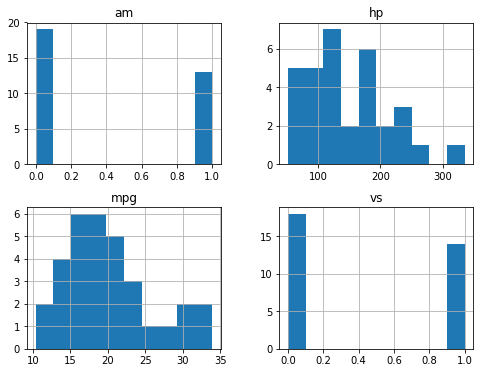

In [18]:
import matplotlib.pyplot as plt 
df.hist(figsize=(8,6)) 
plt.show()

In [19]:
import statsmodels.api as sm
x = df.loc[:,df.columns != 'mpg'] 
x = sm.add_constant(x)
y = df['mpg']
x.sample(6)

,const,hp,vs,am
19,1.0,65,1,1
2,1.0,93,1,1
6,1.0,245,0,0
27,1.0,113,1,1
23,1.0,245,0,0
30,1.0,335,0,1


In [20]:
import statsmodels.formula.api as smf
model = smf.ols(formula='mpg ~ hp + C(vs) + C(am)',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     38.68
Date:                Fri, 20 Sep 2019   Prob (F-statistic):           4.31e-10
Time:                        19:06:32   Log-Likelihood:                -76.171
No. Observations:                  32   AIC:                             160.3
Df Residuals:                      28   BIC:                             166.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.3342      2.233     10.450      0.0

In [21]:
y_hat = model.predict(x) 
y_hat.sample(5)

10    20.492917
4     15.508814
0     23.713922
27    26.238619
11    15.285231
dtype: float64

In [22]:
import numpy as np
model_RMSE = np.sqrt(np.mean(np.square(y_hat-y))) 
model_RMSE

2.6153380579390078

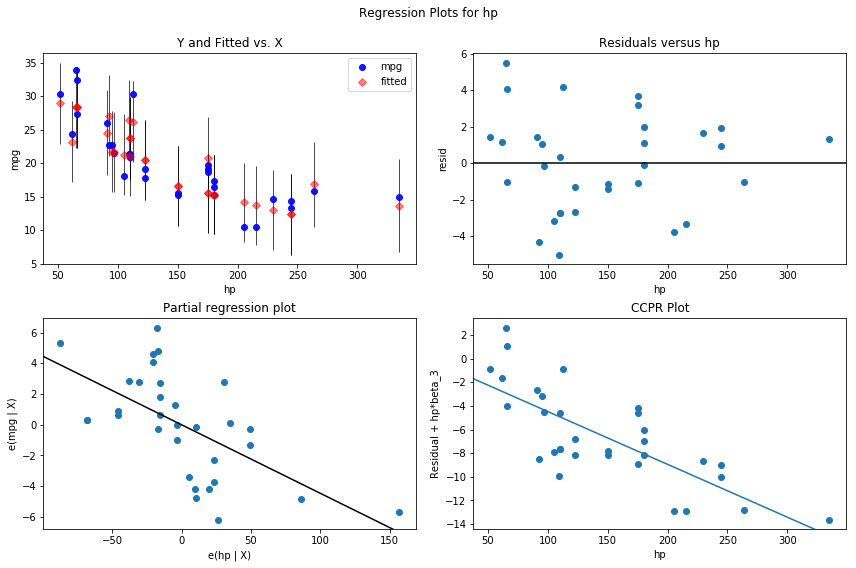

In [23]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, "hp", fig=fig)

In [24]:
# 导入相关数据处理及可视化工具包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 导入线性回归算法模块
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d
# 对notebook和pandas做一些设置
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',150)
 
# 使图片在notebook中显示
%matplotlib inline  
# 导入seaborn作图包
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [25]:
# 读入数据，data为两列数据
data = np.loadtxt('linear_regression_data1.txt', delimiter=',')
# X为两列数据，第一列为1，第二列为data中的第一列
X = np.c_[np.ones(data.shape[0]),data[:,0]]
# y为data中的第2列
y = np.c_[data[:,1]]

In [26]:
data[:10]

array([[ 6.1101, 17.592 ],
       [ 5.5277,  9.1302],
       [ 8.5186, 13.662 ],
       [ 7.0032, 11.854 ],
       [ 5.8598,  6.8233],
       [ 8.3829, 11.886 ],
       [ 7.4764,  4.3483],
       [ 8.5781, 12.    ],
       [ 6.4862,  6.5987],
       [ 5.0546,  3.8166]])

In [27]:
X[:10]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598],
       [1.    , 8.3829],
       [1.    , 7.4764],
       [1.    , 8.5781],
       [1.    , 6.4862],
       [1.    , 5.0546]])

In [28]:
y[:10]

array([[17.592 ],
       [ 9.1302],
       [13.662 ],
       [11.854 ],
       [ 6.8233],
       [11.886 ],
       [ 4.3483],
       [12.    ],
       [ 6.5987],
       [ 3.8166]])

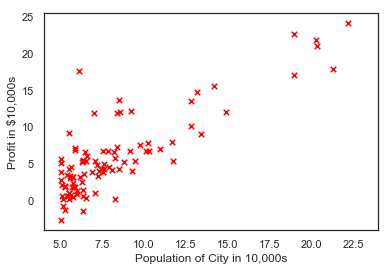

In [29]:
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

In [30]:
def computeCost(X, y, theta=[[0],[0]]):
    m = y.size
    J = 0
    
    h = X.dot(theta)
    
    J = 1.0/(2*m)*(np.sum(np.square(h-y)))
    
    return J

In [31]:
computeCost(X,y)

32.072733877455676

In [32]:
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
  
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1.0/m)*(X.T.dot(h-y))
        J_history[iter] = computeCost(X, y, theta)
    return(theta, J_history)

theta:  [-3.63029144  1.16636235]


Text(0.5, 0, 'Iterations')

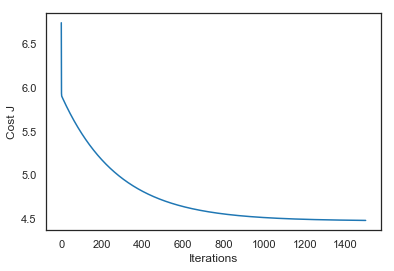

In [33]:
theta , Cost_J = gradientDescent(X, y)
print('theta: ',theta.ravel())
plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations')

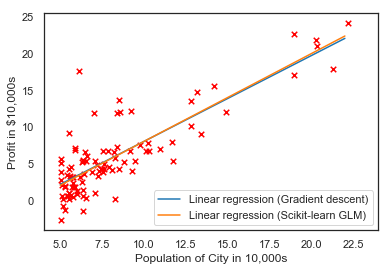

In [34]:
x1 = np.arange(5,23)
y1 = theta[0]+theta[1]*x1

plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(x1,y1, label='Linear regression (Gradient descent)')


regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
plt.plot(x1, regr.intercept_+regr.coef_*x1, label='Linear regression (Scikit-learn GLM)')
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

In [1]:
###输入你的作业答案###
1.  可能会发生变化，theta初值到极值的位置太远，以至在1500次迭代中无法达到极值
    此时我们算出的损失函数结果和theta为(0,0)时不同，
    但当迭代次数无限大时，结果会和初值为(0,0)时一样
2.  sklearn封装了梯度下降算法，但是由于迭代次数不一样，所以最后的曲线有一些变化
###作业答案结束###

SyntaxError: invalid character in identifier (<ipython-input-1-7b3c81ff599e>, line 2)